In [ ]:
%reload_ext autoreload
%autoreload 2
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
%%capture
!pip install transformers

In [ ]:
%%capture
!pip install git+https://github.com/fastai/fastai


In [ ]:
from fastai.basics import *
from fastai.text.all import *
from fastai.callback.all import *
from fastai.interpret import *
import sys
import IPython.utils.io

from functools import partial

from dsnlplib import *


In [ ]:
# Crea nuovo oggetto di configurazione di esperimento
c = DSConfig()

In [ ]:
# Batch size
c.bs = 32

# Lunghezza massima delle sequenze (512 è il default di Bert)
c.max_seq_len = 512  

# Parametro Eps per ottimizzatore AdamW
c.eps=0.0001

# Learning rate
c.lr=1e-6

# Numero massimo di epoch
c.epochs=2000

# Numero massimo di epoch per cui la validation loss può non migliorare, prima dello stop del training
c.patience=20

# Utilizza funzione di attivazione ReLU prima dell'ultimo livello
c.use_activ = True

In [ ]:
# Lista dei pesi di pre-addestramento da utilizzare nell'esperimento
c.pretraineds = ['dbmdz/bert-base-italian-xxl-uncased', 
               #'m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0'
               ]

# Lista dei modelli da utilizzare nell'esperimento
c.models = [
            (BertClfier,empty_config),
            (BertLast4ClsTokenClfier,empty_config),
            (BertLast4ClsTokenDenseClfier,empty_config),
            (BertLast4CnnClfier, cnn_config),
            (BertLast4PadCnnClfier, cnn_config),
]

In [ ]:
# Modello da utilizzare per la run
c.pretrain_id = c.pretraineds[0]

In [ ]:
# Path dei dataframe di train e e test
c.df_path = 'data/texts2.1.max_512.train.balanced_rep.separate_q.csv'
c.test_df_path = 'data/texts2.1.max_512.test.balanced_rep.separate_q.csv'


In [ ]:
# ID (rispetto a quanto in c.models) del modello da usare per la run
c.model_idx = 0

In [ ]:
# Colonna dei dataframe (train e test) con l'etichetta
c.label_attr = 'Rep'

In [ ]:
# Utilizza come input sia la domanda che la risposta (altrimenti il dataloader usa solo la risposta)
c.use_qa = True

In [ ]:
# Esegue 10-fold validation
c.cross_validation = True

In [ ]:
# Inizializza esperimento
exp = DSExperiment(c)

Enter a name for this experiment: 206
Resuming experiment named: 206





Weights: dbmdz/bert-base-italian-xxl-uncased
Model: BertClfier
Exp name: 206
Training conf:
df_path: data/texts2.1.max_512.train.balanced_rep.separate_q.csv
test_df_path: data/texts2.1.max_512.test.balanced_rep.separate_q.csv
bs: 32
max_seq_len: 512
sentence_pair: False
eps: 0.0001
lr: 1e-06
epochs: 2000
patience: 20
plateau_patience: 5
pretraineds: ['dbmdz/bert-base-italian-xxl-uncased']
pretrain_id: dbmdz/bert-base-italian-xxl-uncased
models: [(<class 'dsnlplib.models.BertClfier'>, <function empty_config at 0x7f29ce6e9d90>), (<class 'dsnlplib.models.BertLast4ClsTokenClfier'>, <function empty_config at 0x7f29ce6e9d90>), (<class 'dsnlplib.models.BertLast4ClsTokenDenseClfier'>, <function empty_config at 0x7f29ce6e9d90>), (<class 'dsnlplib.models.BertLast4CnnClfier'>, <function cnn_config at 0x7f29ce6e9e18>), (<class 'dsnlplib.models.BertLast4PadCnnClfier'>, <function cnn_config at 0x7f29ce6e9e18>)]
results: {'valid': {'loss': [1.9644321203231812], 'accuracy': [0.38963964581489563], '

In [ ]:
# Avvia esperimento
exp.run()

Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors
Some weights of the model checkpoint at dbmdz/bert-base-italian-xxl-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.Lay

dbmdz/bert-base-italian-xxl-uncased/2020-09-14_11:13:26 BertClfier - lr: 1e-06


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 0 with valid_loss value: 3.161119222640991.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 1 with valid_loss value: 3.1372101306915283.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 2 with valid_loss value: 3.1197497844696045.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 3 with valid_loss value: 3.105207681655884.


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 4 with valid_loss value: 3.092620611190796.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 5 with valid_loss value: 3.0794880390167236.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 6 with valid_loss value: 3.0673487186431885.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this mod

Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 7 with valid_loss value: 3.0542373657226562.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 8 with valid_loss value: 3.0397658348083496.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 9 with valid_loss value: 3.025886297225952.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 10 with valid_loss value: 3.010737895965576.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this mod

Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 11 with valid_loss value: 2.9962611198425293.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 12 with valid_loss value: 2.979525566101074.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 13 with valid_loss value: 2.9629054069519043.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 14 with valid_loss value: 2.944563388824463.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 15 with valid_loss value: 2.9260776042938232.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 16 with valid_loss value: 2.909438371658325.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 17 with valid_loss value: 2.8906543254852295.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 18 with valid_loss value: 2.8714632987976074.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 19 with valid_loss value: 2.853869915008545.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 20 with valid_loss value: 2.8362767696380615.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 21 with valid_loss value: 2.8162224292755127.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 22 with valid_loss value: 2.794771432876587.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 23 with valid_loss value: 2.7731306552886963.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 24 with valid_loss value: 2.751709461212158.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 25 with valid_loss value: 2.7320120334625244.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 26 with valid_loss value: 2.7112302780151367.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 27 with valid_loss value: 2.691362142562866.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 28 with valid_loss value: 2.6714529991149902.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 29 with valid_loss value: 2.6518607139587402.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 30 with valid_loss value: 2.632439374923706.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 31 with valid_loss value: 2.6121346950531006.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 32 with valid_loss value: 2.5934488773345947.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 33 with valid_loss value: 2.575946807861328.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 34 with valid_loss value: 2.5586464405059814.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 35 with valid_loss value: 2.5450921058654785.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 36 with valid_loss value: 2.5286056995391846.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 37 with valid_loss value: 2.513824462890625.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 38 with valid_loss value: 2.498415231704712.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 39 with valid_loss value: 2.484233856201172.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 40 with valid_loss value: 2.4713752269744873.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 41 with valid_loss value: 2.456313371658325.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 42 with valid_loss value: 2.4439027309417725.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 43 with valid_loss value: 2.4301750659942627.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 44 with valid_loss value: 2.4162545204162598.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 45 with valid_loss value: 2.4030706882476807.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 46 with valid_loss value: 2.3905627727508545.


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 47 with valid_loss value: 2.378089666366577.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 48 with valid_loss value: 2.366628885269165.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 49 with valid_loss value: 2.3565902709960938.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 50 with valid_loss value: 2.3453078269958496.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 51 with valid_loss value: 2.3321762084960938.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 52 with valid_loss value: 2.320822238922119.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 53 with valid_loss value: 2.3081488609313965.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 54 with valid_loss value: 2.2970054149627686.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 55 with valid_loss value: 2.2868492603302.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 56 with valid_loss value: 2.2776191234588623.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 57 with valid_loss value: 2.269357442855835.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 58 with valid_loss value: 2.257606029510498.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this mod

Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 59 with valid_loss value: 2.2468326091766357.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 60 with valid_loss value: 2.2353098392486572.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 61 with valid_loss value: 2.228667974472046.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 62 with valid_loss value: 2.2193031311035156.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 63 with valid_loss value: 2.2126376628875732.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 64 with valid_loss value: 2.20074462890625.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 65 with valid_loss value: 2.1963412761688232.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 66 with valid_loss value: 2.1854424476623535.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 67 with valid_loss value: 2.1782257556915283.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 68 with valid_loss value: 2.169191360473633.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 69 with valid_loss value: 2.160933256149292.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 70 with valid_loss value: 2.153346538543701.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 71 with valid_loss value: 2.1423754692077637.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 72 with valid_loss value: 2.1369943618774414.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 73 with valid_loss value: 2.1337389945983887.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 74 with valid_loss value: 2.128262758255005.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 75 with valid_loss value: 2.118901491165161.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 76 with valid_loss value: 2.1153972148895264.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 77 with valid_loss value: 2.1115453243255615.


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 78 with valid_loss value: 2.1053574085235596.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 79 with valid_loss value: 2.100641965866089.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 80 with valid_loss value: 2.095707893371582.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 81 with valid_loss value: 2.091383934020996.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 82 with valid_loss value: 2.088146686553955.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 83 with valid_loss value: 2.0829005241394043.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 84 with valid_loss value: 2.078230857849121.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 85 with valid_loss value: 2.0726664066314697.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 86 with valid_loss value: 2.0684585571289062.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 87 with valid_loss value: 2.067326068878174.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 88 with valid_loss value: 2.059894323348999.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 89 with valid_loss value: 2.0562918186187744.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 90 with valid_loss value: 2.0523979663848877.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 91 with valid_loss value: 2.047717332839966.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 92 with valid_loss value: 2.0465266704559326.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 93 with valid_loss value: 2.0463171005249023.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 94 with valid_loss value: 2.042968988418579.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 95 with valid_loss value: 2.0405986309051514.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 96 with valid_loss value: 2.0381479263305664.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 97 with valid_loss value: 2.0332319736480713.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 98 with valid_loss value: 2.030104875564575.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 99 with valid_loss value: 2.029416799545288.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 100 with valid_loss value: 2.0247256755828857.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 101 with valid_loss value: 2.0220367908477783.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 102 with valid_loss value: 2.0170397758483887.


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 103 with valid_loss value: 2.0144364833831787.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 106 with valid_loss value: 2.010471820831299.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 107 with valid_loss value: 2.0077266693115234.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this mod

Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 108 with valid_loss value: 2.005463123321533.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 109 with valid_loss value: 2.0031678676605225.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 110 with valid_loss value: 2.002249240875244.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 111 with valid_loss value: 1.999325156211853.


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 112 with valid_loss value: 1.9965543746948242.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 114 with valid_loss value: 1.9934934377670288.


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this mod

Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 117 with valid_loss value: 1.9915775060653687.


Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 120 with valid_loss value: 1.988615870475769.


Buffered data was truncated after reaching the output size limit.

Token indices sequence length is longer than the specified maximum sequence length for this model (16 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (27 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (26 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Some weights of the model checkpoint at dbmdz/bert-base-italian-xxl-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification

dbmdz/bert-base-italian-xxl-uncased/2020-09-14_11:13:26 BertClfier - lr: 1e-06
******************************
valid metrics for dbmdz/bert-base-italian-xxl-uncased/2020-09-14_11:13:26 BertClfier - lr: 1e-06


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 0 with valid_loss value: 0.38963964581489563.


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (25 > 512). Running this sequence through the model will result in indexing errors


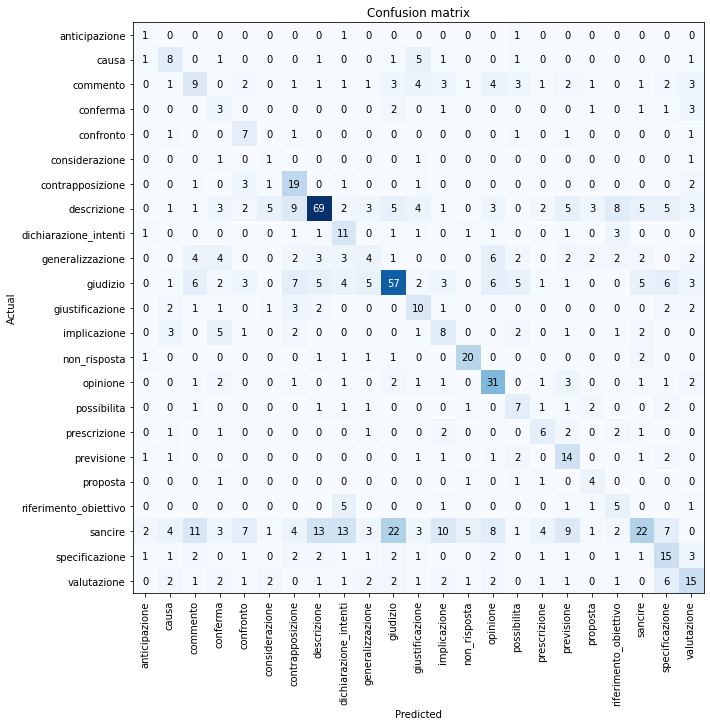

                       precision    recall  f1-score   support

        anticipazione       0.12      0.33      0.18         3
                causa       0.31      0.40      0.35        20
             commento       0.24      0.20      0.22        44
             conferma       0.10      0.25      0.15        12
            confronto       0.26      0.58      0.36        12
       considerazione       0.09      0.25      0.13         4
     contrapposizione       0.37      0.68      0.47        28
          descrizione       0.69      0.50      0.58       139
dichiarazione_intenti       0.24      0.50      0.32        22
     generalizzazione       0.18      0.10      0.13        39
             giudizio       0.58      0.47      0.52       122
      giustificazione       0.28      0.40      0.33        25
         implicazione       0.23      0.31      0.26        26
         non_risposta       0.67      0.74      0.70        27
             opinione       0.48      0.65      0.55  

Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors
Some weights of the model checkpoint at dbmdz/bert-base-italian-xxl-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model t

dbmdz/bert-base-italian-xxl-uncased/2020-09-14_11:13:26 BertClfier - lr: 1e-06
******************************
test metrics for dbmdz/bert-base-italian-xxl-uncased/2020-09-14_11:13:26 BertClfier - lr: 1e-06


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


Better model found at epoch 0 with valid_loss value: 0.38675743341445923.


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


Token indices sequence length is longer than the specified maximum sequence length for this model (66 > 512). Running this sequence through the model will result in indexing errors


,precision,recall,f1-score,support
anticipazione,0.00,0.00,0.00,11
causa,0.23,0.44,0.30,79
commento,0.17,0.17,0.17,159
conferma,0.15,0.39,0.22,46
confronto,0.23,0.53,0.32,57
considerazione,0.04,0.12,0.06,8
contrapposizione,0.41,0.64,0.50,104
descrizione,0.65,0.44,0.53,554
dichiarazione_intenti,0.27,0.51,0.35,53
generalizzazione,0.12,0.16,0.14,126


{'test': {'accuracy': 0.38675743341445923,
          'fbeta': 0.31739256252798176,
          'loss': 2.0436363220214844,
          'mcc': 0.3417976849427512,
          'rocauc': 0.869167869157139},
 'valid': {'accuracy': 0.38963964581489563,
           'fbeta': 0.3410323497687747,
           'loss': 1.9644321203231812,
           'mcc': 0.3518271924436428,
           'rocauc': 0.8955507063193539}}


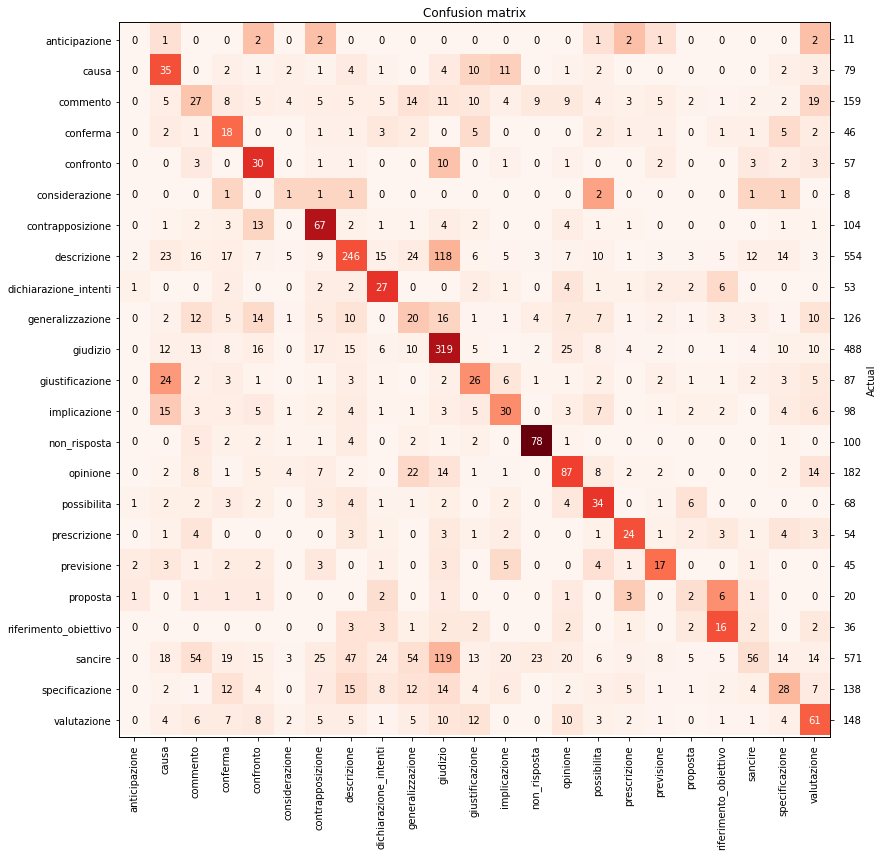

In [ ]:
# Metriche dell'esperimento (utile come call separata perchè, come da cella precedente, a volte l'output della cella viene tagliato)
exp.benchmark()